# CSCE 633 :: Machine Learning :: Texas A&M University :: Fall 2023

# Homework 3 (HW-3)
**Name: Shwetima Sakshi**  
**UIN: 934008489**  
**Due on Tue, Nov 14, by 11:59 PM.**

**Q1: Machine learning for object recognition**

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

# load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
pip install opencv-python

In [4]:
# convert to grayscale images
from skimage.color import rgb2gray
X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

**Q1(a) (6 points) Visualization:** Randomly select and visualize 5-6 images (no need to include all the classes).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

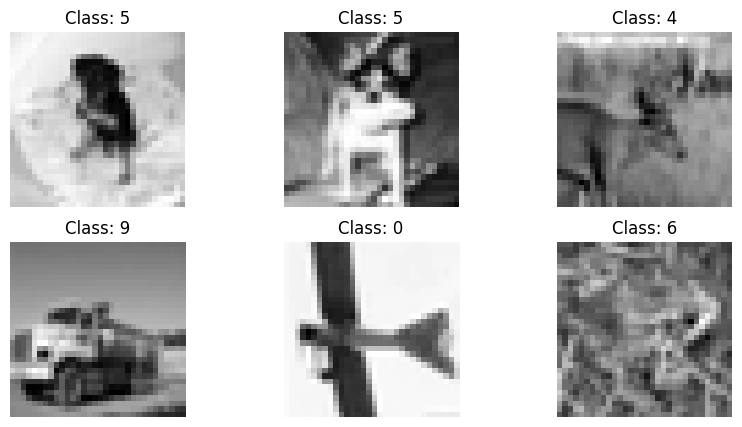

In [6]:
# Randomly select and visualize 6 images
num_images_to_visualize = 6
selected_indices = np.random.choice(X_train.shape[0], num_images_to_visualize, replace=False)

# Create a figure to display the images
plt.figure(figsize=(10, 5))

for i, index in enumerate(selected_indices):
    image = X_train_gray[index]
    label = y_train[index][0]  # The label is the class ID

    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.show()

**Q1(b) (6 points) Data exploration:** Count the number of samples per class in the training data.

In [7]:
# Calculate the number of samples per class
classes, counts = np.unique(y_train, return_counts=True)

# Create a dictionary to store the counts per class
samples_per_class = dict(zip(classes, counts))

# Print the number of samples per class
for class_id, count in samples_per_class.items():
    print(f"Class {class_id}: {count} samples")


Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples


**Explanation:** Till this step I have done data exploration a little. I have converted the images in the data set to gray scale as the training takes more time if they are colored. I have plotted some of the images to check how they look. I also check the number of samples present per class. Also, we can see the training set and testing set is already divided in the input data set so on loading the data itself, we got training and testing set separately.

**Q1(c) (26 points) Image classification with FNNs:** In this part, you will use a feedforward
neural network (FNN) (also called “multilayer perceptron”) to perform the object classification
task. The input of the FNN comprises of all the pixels of the image. Use one of the five batches
of the training data as a validation set.

In [8]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time


# Split the training data into training and validation sets (using one batch as a validation set)
X_train_data, X_val, y_train_data, y_val = train_test_split(X_train_gray, y_train, test_size=0.2, random_state=42)

print('Shape of training data:', X_train_data.shape)
print('Shape of validating data:', X_val.shape)

# Preprocess the data
X_train_data = X_train_data.reshape(-1, 32*32*1)
X_val = X_val.reshape(-1, 32*32*1)

# One-hot encode the labels for different classes
y_train_data = to_categorical(y_train_data, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

Shape of training data: (40000, 32, 32)
Shape of validating data: (10000, 32, 32)


**Explanation:** In this step I have preprocessed the data. I have divided the gray scale input data into training and validation halves. I am dividing the data this way to train my model better. I can use this to check overfitting of the model by plotting the loss and accuracy for validation and training over the number of epochs my model run. This can help me in modifying the model further. I have also done one-hot encoding of the labels so that they can be processed properly by the model.

**Q1(c.i) (20 points) Experiment on the validation set with different FNN hyper-parameters**, e.g. layers, nodes per layer, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following:
(1) monitor the loss on the train and validation set across the epochs of the FNN training;
(2) report the final classification accuracy on the training and validation sets;
(3) report the running time for training the FNN;
(4) report the # parameters that are learned for each FNN.

Epoch 1/50
625/625 [==============================] - 9s 5ms/step - loss: 2.0374 - accuracy: 0.2567 - val_loss: 1.9410 - val_accuracy: 0.3004
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 1.8953 - accuracy: 0.3205 - val_loss: 1.8696 - val_accuracy: 0.3344
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 1.8257 - accuracy: 0.3488 - val_loss: 1.8559 - val_accuracy: 0.3386
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.7731 - accuracy: 0.3674 - val_loss: 1.7926 - val_accuracy: 0.3507
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 1.7352 - accuracy: 0.3813 - val_loss: 1.7642 - val_accuracy: 0.3771
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 1.7039 - accuracy: 0.3914 - val_loss: 1.7707 - val_accuracy: 0.3689
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 1.6779 - accuracy: 0.4029 - val_loss: 1.7698 - val_accuracy: 0.3741
Epoch 

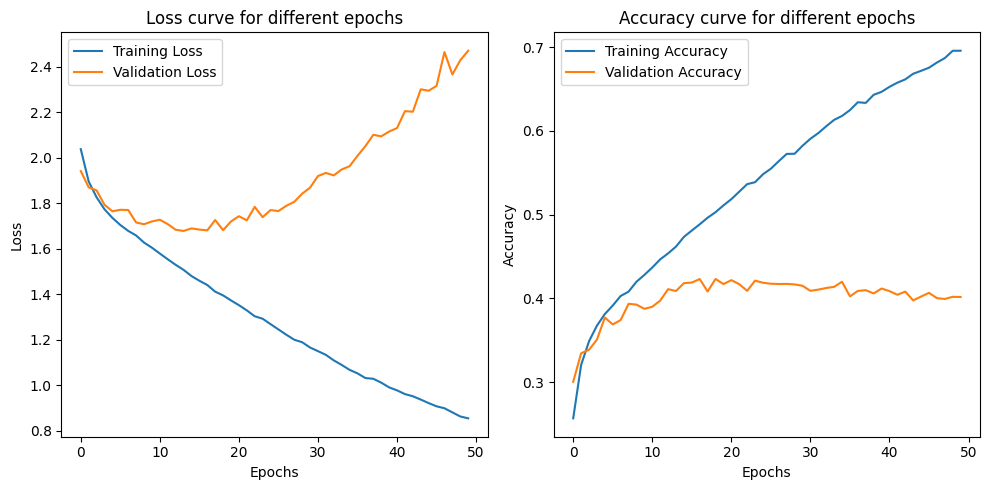

In [9]:
fnn_model1 = Sequential()
fnn_model1.add(Dense(512, activation='relu', input_shape=(X_train_data.shape[1],)))
fnn_model1.add(Dense(256, activation='relu'))
fnn_model1.add(Dense(128, activation='relu'))
# Output layer with 10 classes
fnn_model1.add(Dense(10, activation='softmax'))

# Compile the model
fnn_model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model using mini batch method
early_stopping = EarlyStopping(monitor='loss', patience=5)
start_time = time.time()
history1 = fnn_model1.fit(X_train_data, y_train_data, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
train_loss_list1 = history1.history['loss']
train_accuracy_list1 = history1.history['accuracy']

validation_loss_list1 = history1.history['val_loss']
validation_accuracy_list1 = history1.history['val_accuracy']

# Evaluate the model on the validation set
validation_loss1, validation_accuracy1 = fnn_model1.evaluate(X_val, y_val)
train_loss1, train_accuracy1 = fnn_model1.evaluate(X_train_data, y_train_data)
num_parameters1 = fnn_model1.count_params()

elapsed_time = (time.time()-start_time) * 10**3
sec = (elapsed_time/1000)%60
min = (elapsed_time/(1000*60))%60

print(f"Validation Loss: {validation_loss1:.4f}")
print(f"Validation Accuracy: {validation_accuracy1*100:.2f}%")
print(f"Training Loss: {train_loss1:.4f}")
print(f"Training Accuracy: {train_accuracy1*100:.2f}%")

print(f"Number of Parameters: {num_parameters1}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")


# Create an array of epoch numbers
epochs = range(1, len(train_loss_list1) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list1, label='Training Loss')
plt.plot(validation_loss_list1, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in train_accuracy_list1]
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list1, label='Training Accuracy')
plt.plot(validation_accuracy_list1, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



**Explanation:** In the first model, I have kept the hyperparameters simple. I have started with less number of hidden layers, low learning rate (= 0.001 ) to ensure that weights are updated slowly, 50 epochs and a batch size of 64. The results show that the model is getting overfit very soon and the the validation accuracy is 40.16%

Epoch 1/100
1250/1250 [==============================] - 13s 7ms/step - loss: 2.1518 - accuracy: 0.2255 - val_loss: 2.0783 - val_accuracy: 0.2504
Epoch 2/100
1250/1250 [==============================] - 8s 7ms/step - loss: 2.0587 - accuracy: 0.2585 - val_loss: 2.0570 - val_accuracy: 0.2541
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0114 - accuracy: 0.2729 - val_loss: 1.9725 - val_accuracy: 0.2898
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9759 - accuracy: 0.2878 - val_loss: 2.0216 - val_accuracy: 0.2641
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9455 - accuracy: 0.3001 - val_loss: 1.9364 - val_accuracy: 0.3058
Epoch 6/100
1250/1250 [==============================] - 8s 7ms/step - loss: 1.9221 - accuracy: 0.3130 - val_loss: 1.9739 - val_accuracy: 0.2944
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9074 - accuracy: 0.3192 - val_loss: 1.8847 - val_a

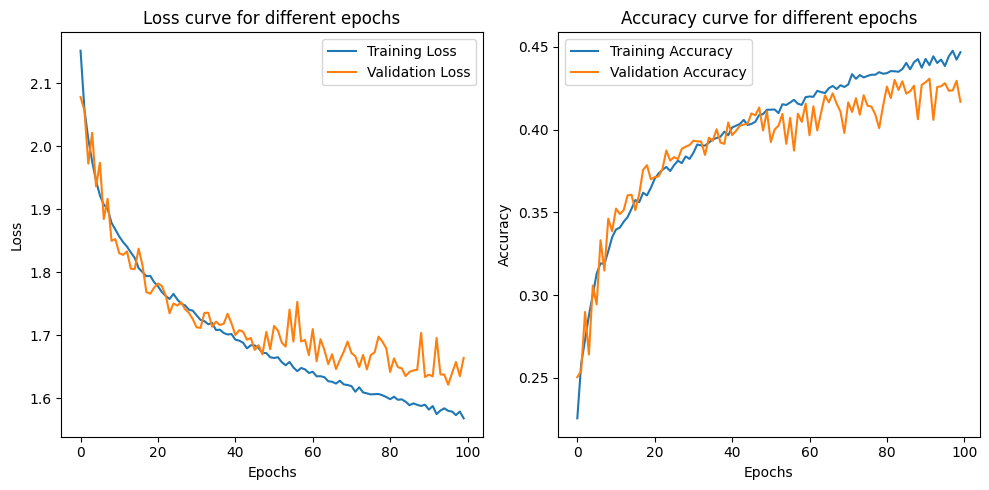

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time
import matplotlib.pyplot as plt

# Create a feedforward neural network with BatchNormalization
fnn_model2 = Sequential()
fnn_model2.add(Dense(512, activation='relu', input_shape=(X_train_data.shape[1],)))
fnn_model2.add(BatchNormalization())  # Add BatchNormalization
fnn_model2.add(Dropout(0.2))
fnn_model2.add(Dense(256, activation='relu'))
fnn_model2.add(BatchNormalization())  # Add BatchNormalization
fnn_model2.add(Dense(128, activation='relu'))
fnn_model2.add(BatchNormalization())  # Add BatchNormalization
fnn_model2.add(Dense(64, activation='relu'))
fnn_model2.add(Dropout(0.2))  # Adding dropout for regularization
fnn_model2.add(Dense(10, activation='softmax'))

# Output layer with 10 classes
fnn_model2.add(Dense(10, activation='softmax'))

# Compile the model
fnn_model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the model using mini batch method
early_stopping = EarlyStopping(monitor='loss', patience=5)
start_time = time.time()
history2 = fnn_model2.fit(X_train_data, y_train_data, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
train_loss_list2 = history2.history['loss']
train_accuracy_list2 = history2.history['accuracy']

validation_loss_list2 = history2.history['val_loss']
validation_accuracy_list2 = history2.history['val_accuracy']

# Evaluate the model on the validation set
validation_loss2, validation_accuracy2 = fnn_model2.evaluate(X_val, y_val)
train_loss2, train_accuracy2 = fnn_model2.evaluate(X_train_data, y_train_data)
num_parameters2 = fnn_model2.count_params()

elapsed_time = (time.time()-start_time) * 10**3
sec = (elapsed_time/1000) % 60
min = (elapsed_time/(1000*60)) % 60

print(f"Validation Loss: {validation_loss2:.4f}")
print(f"Validation Accuracy: {validation_accuracy2*100:.2f}%")
print(f"Training Loss: {train_loss2:.4f}")
print(f"Training Accuracy: {train_accuracy2*100:.2f}%")

print(f"Number of Parameters: {num_parameters2}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")

# Create an array of epoch numbers
epochs = range(1, len(train_loss_list2) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list2, label='Training Loss')
plt.plot(validation_loss_list2, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in train_accuracy_list2]
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list2, label='Training Accuracy')
plt.plot(validation_accuracy_list2, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Explanation:** In the second model, I have increased the number of hidden layers, added batch normalization and dropouts to regularize. Also increased the learning rate and altered the batch size to see how the model converges. I had tried this model for different number of epochs. The model was converging slow so I kept 100 epochs to check at which epoch overfirtting occurred.

Epoch 1/50
625/625 [==============================] - 9s 9ms/step - loss: 2.1664 - accuracy: 0.2178 - val_loss: 2.1281 - val_accuracy: 0.2207
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 2.0798 - accuracy: 0.2460 - val_loss: 2.0549 - val_accuracy: 0.2588
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 2.0266 - accuracy: 0.2677 - val_loss: 2.0933 - val_accuracy: 0.2357
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 1.9770 - accuracy: 0.2923 - val_loss: 2.0368 - val_accuracy: 0.2590
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 1.9386 - accuracy: 0.3065 - val_loss: 1.9936 - val_accuracy: 0.2790
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 1.9096 - accuracy: 0.3189 - val_loss: 1.9456 - val_accuracy: 0.3030
Epoch 7/50
625/625 [==============================] - 5s 7ms/step - loss: 1.8835 - accuracy: 0.3271 - val_loss: 1.8784 - val_accuracy: 0.3306
Epoch 

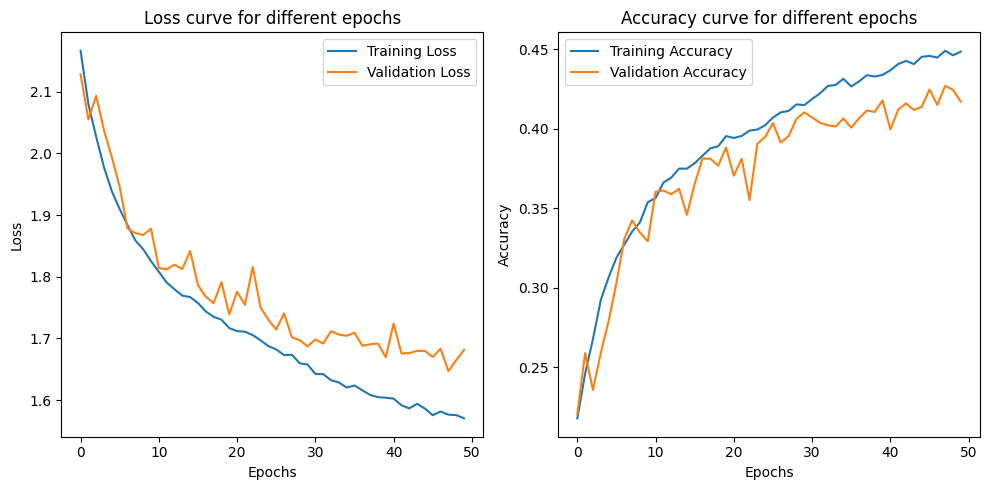

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time
import matplotlib.pyplot as plt

# Create a feedforward neural network with BatchNormalization
fnn_model3 = Sequential()
fnn_model3.add(Dense(512, activation='relu', input_shape=(X_train_data.shape[1],)))
fnn_model3.add(BatchNormalization())  # Add BatchNormalization
fnn_model3.add(Dropout(0.2))
fnn_model3.add(Dense(256, activation='relu'))
fnn_model3.add(BatchNormalization())  # Add BatchNormalization
fnn_model3.add(Dense(128, activation='relu'))
fnn_model3.add(BatchNormalization())  # Add BatchNormalization
fnn_model3.add(Dense(64, activation='relu'))
fnn_model3.add(Dropout(0.2))  # Adding dropout for regularization
fnn_model3.add(Dense(10, activation='softmax'))

# Output layer with 10 classes
fnn_model3.add(Dense(10, activation='softmax'))

# Compile the model
fnn_model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train the model using mini batch method
early_stopping = EarlyStopping(monitor='loss', patience=5)
start_time = time.time()
history3 = fnn_model3.fit(X_train_data, y_train_data, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
train_loss_list3 = history3.history['loss']
train_accuracy_list3 = history3.history['accuracy']

validation_loss_list3 = history3.history['val_loss']
validation_accuracy_list3 = history3.history['val_accuracy']

# Evaluate the model on the validation set
validation_loss3, validation_accuracy3 = fnn_model3.evaluate(X_val, y_val)
train_loss3, train_accuracy3 = fnn_model3.evaluate(X_train_data, y_train_data)
num_parameters3 = fnn_model3.count_params()

elapsed_time = (time.time()-start_time) * 10**3
sec = (elapsed_time/1000) % 60
min = (elapsed_time/(1000*60)) % 60

print(f"Validation Loss: {validation_loss3:.4f}")
print(f"Validation Accuracy: {validation_accuracy3*100:.2f}%")
print(f"Training Loss: {train_loss3:.4f}")
print(f"Training Accuracy: {train_accuracy3*100:.2f}%")

print(f"Number of Parameters: {num_parameters3}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")

# Create an array of epoch numbers
epochs = range(1, len(train_loss_list3) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list3, label='Training Loss')
plt.plot(validation_loss_list3, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in train_accuracy_list3]
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list3, label='Training Accuracy')
plt.plot(validation_accuracy_list3, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Explanation:** The model 2 looked quite good but it had very slow convergence, so in model 3 I increased the learning rate and batch size. Also decreased epoch as I could see the model 2 was getting overfit somewhere around 40 epochs.

**Q1.(c.ii) (6 points) Run the best model that was found based on the validation set from question
(c.i) on the testing set.**
Report the classification accuracy on the testing set.
Report the confusion matrix for each class.
Note: The confusion matrix is a 10×10 matrix; its rows correspond to the actual labels for
each class, while its columns correspond to the predicted classes. Element (i, j) includes the
number of samples that belonged to the i
th class and were predicted as the j
th class. In a perfect
classification task, the non-diagonal elements of the matrix will be all non-zero.

(10000, 1024)
313/313 [==============================] - 1s 2ms/step
Test Set Accuracy: 41.21%
Confusion Matrix:
[[357  48  95  17  85  10  88  32 209  59]
 [ 30 566   4  15  27  10  57  19 119 153]
 [ 93  34 315  66 159  62 150  39  57  25]
 [ 46  51  69 145  99 182 209  61  48  90]
 [ 77  36 154  33 349  40 145  79  61  26]
 [ 39  22  90 119  90 336 136  87  40  41]
 [ 20  85  69  35 118  34 536  17  39  47]
 [ 50  31  41  37 106  77  82 451  56  69]
 [ 82  97  18  20  25  26  55  22 592  63]
 [ 36 241  12  25  16  13  44  25 114 474]]


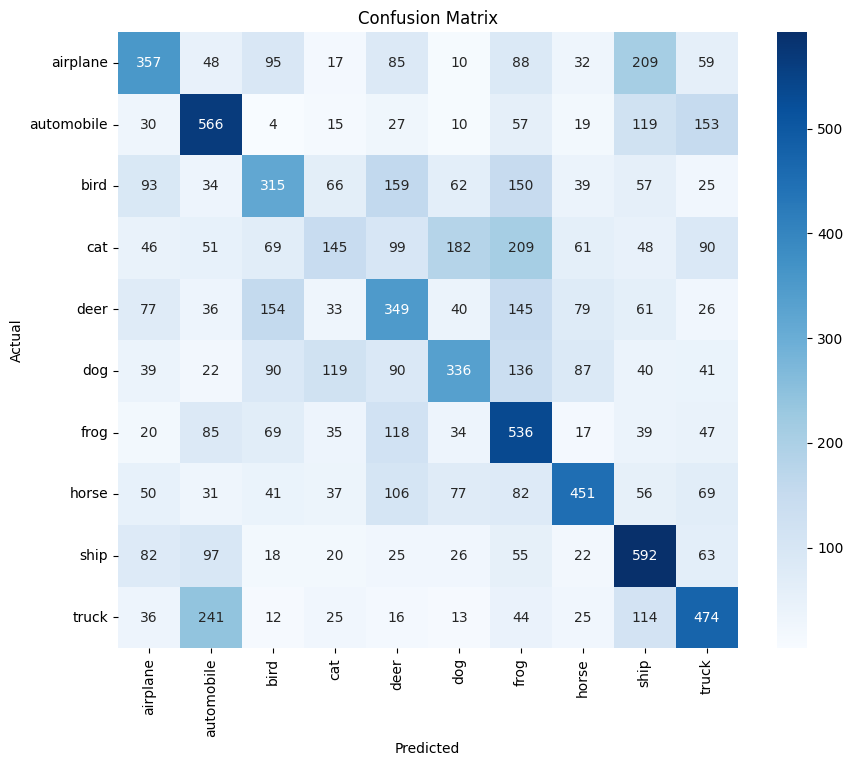

Classification Report:
              precision    recall  f1-score   support

    airplane       0.43      0.36      0.39      1000
  automobile       0.47      0.57      0.51      1000
        bird       0.36      0.32      0.34      1000
         cat       0.28      0.14      0.19      1000
        deer       0.32      0.35      0.34      1000
         dog       0.43      0.34      0.38      1000
        frog       0.36      0.54      0.43      1000
       horse       0.54      0.45      0.49      1000
        ship       0.44      0.59      0.51      1000
       truck       0.45      0.47      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.40     10000
weighted avg       0.41      0.41      0.40     10000



In [12]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test_data = X_test_gray.copy()
X_test_data = X_test_data.reshape(-1, 32*32*1)
print(X_test_data.shape)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Use the trained model to make predictions on the test set
y_pred = fnn_model3.predict(X_test_data)

# Convert one-hot encoded predictions to class labels
y_pred_labels = tf.argmax(y_pred, axis=1)

# Calculate classification accuracy
accuracy_val = accuracy_score(y_test, y_pred_labels)
print(f"Test Set Accuracy: {accuracy_val*100:.2f}%")

####################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(confusion)

# Set the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred_labels, target_names=class_names)
print("Classification Report:")
print(report)

**Explanation:** The third model has the highest validation accuracy hence choosing the third model as the best model for testing set. Also, plotted the confusion matrix for all the 10 classes and generated a classification report.

**Q1.(d) (26 points) Image classification with CNNs:** In this part, you will use a convolutional
neural network (CNN) to perform the object classification task.

In [13]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import cv2

# load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# Split the training data into training and validation sets (using one batch as a validation set)
X_train_data, X_val, y_train_data, y_val = train_test_split(X_train_gray, y_train, test_size=0.2, random_state=42)

print('Shape of training data:', X_train_data.shape)
print('Shape of validating data:', X_val.shape)

# One-hot encode the labels for different classes
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
y_train_data = one_hot_encoder.transform(y_train_data)
y_val = one_hot_encoder.transform(y_val)
y_test = one_hot_encoder.transform(y_test)

Shape of training data: (40000, 32, 32)
Shape of validating data: (10000, 32, 32)


**Explanation:** Importing more libraries that can be used further and preprocessing the input data after loading again from the given data setfor CNN model. Same as in FNN model, for CNN also I have divided the training set into training and validation set and done one hot encoding of the labels.

**Q1.(d.i) (20 points) Experiment on the validation set with different CNN hyper-parameters**, e.g.layers, filter size, stride size, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following:
(1) monitor the loss on the train and validation set across the epochs of the CNN training;
(2) report the final classification accuracy on the training and validation sets;
(3) report the running time for training the CNN;
(4) report the parameters that are learned for each CNN. How do these metrics compare to the FNN?

Epoch 1/20
625/625 [==============================] - 10s 6ms/step - loss: 2.2331 - accuracy: 0.2615 - val_loss: 1.7093 - val_accuracy: 0.3735
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.5601 - accuracy: 0.4431 - val_loss: 1.5021 - val_accuracy: 0.4666
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 1.3738 - accuracy: 0.5193 - val_loss: 1.3496 - val_accuracy: 0.5201
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 1.2603 - accuracy: 0.5597 - val_loss: 1.3001 - val_accuracy: 0.5445
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1730 - accuracy: 0.5947 - val_loss: 1.2318 - val_accuracy: 0.5694
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0889 - accuracy: 0.6249 - val_loss: 1.1686 - val_accuracy: 0.6026
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0298 - accuracy: 0.6458 - val_loss: 1.1611 - val_accuracy: 0.6087
Epoch

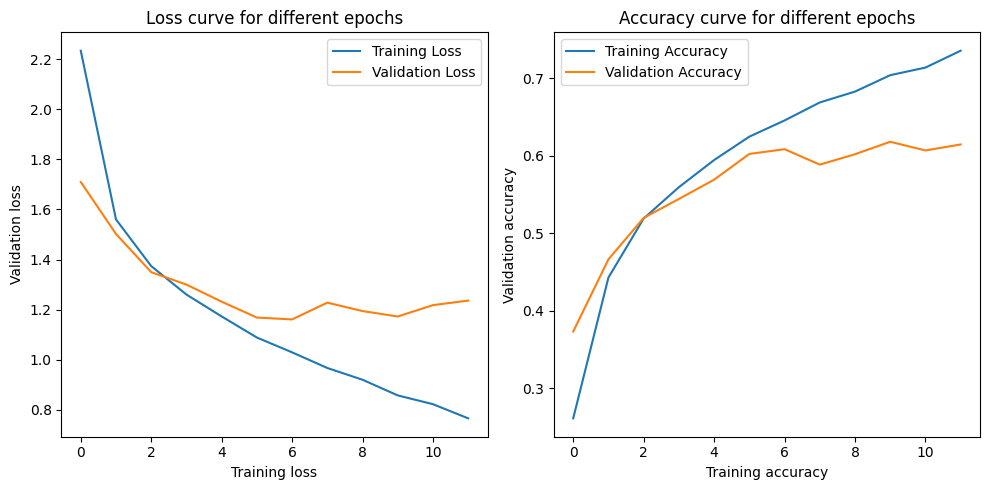

In [14]:
from keras.layers import Conv2D, MaxPooling2D

# Define and train the first CNN model (example)
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model1.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model1.add(Flatten())

cnn_model1.add(Dense(64, activation='relu'))
cnn_model1.add(Dense(32, activation='relu'))

cnn_model1.add(Dense(10, activation='softmax'))
optimizer_val = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

cnn_model1.compile(loss='categorical_crossentropy', optimizer=optimizer_val, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
start_time = time.time()
cnn_history1 = cnn_model1.fit(X_train_data, y_train_data, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
cnn_train_loss_list1 = cnn_history1.history['loss']
cnn_train_accuracy_list1 = cnn_history1.history['accuracy']

cnn_validation_loss_list1 = cnn_history1.history['val_loss']
cnn_validation_accuracy_list1 = cnn_history1.history['val_accuracy']

# Evaluate the first CNN model
cnn_train_loss1, cnn_train_accuracy1 = cnn_model1.evaluate(X_train_data, y_train_data)
cnn_validation_loss1, cnn_validation_accuracy1 = cnn_model1.evaluate(X_val, y_val)
cnn_num_parameters1 = cnn_model1.count_params()

elapsed_time = (end_time - start_time)
elapsed_time = (time.time()-start_time) * 10**3
sec = (elapsed_time/1000)%60
min = (elapsed_time/(1000*60))%60

print("\n==================================================================================")
print(f"Validation Loss: {cnn_validation_loss1:.4f}")
print(f"Validation Accuracy: {cnn_validation_accuracy1*100:.2f}%")
print(f"Training Loss: {cnn_train_loss1:.4f}")
print(f"Training Accuracy: {cnn_train_accuracy1*100:.2f}%")
print(f"Number of Parameters: {cnn_num_parameters1}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")

# Create an array of epoch numbers
epochs = range(1, len(cnn_train_loss_list1) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_train_loss_list1, label='Training Loss')
plt.plot(cnn_validation_loss_list1, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Training loss')
plt.ylabel('Validation loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in cnn_train_accuracy_list1]
plt.subplot(1, 2, 2)
plt.plot(cnn_train_accuracy_list1, label='Training Accuracy')
plt.plot(cnn_validation_accuracy_list1, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Training accuracy')
plt.ylabel('Validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Explanation:** For the first model, I have used low learning rate with only two convolutional layers only. The batch size is also kept medium. This is to check how a simple model works on the data set given and avoid any unnecessary complication of the model.

Epoch 1/100
625/625 [==============================] - 21s 28ms/step - loss: 2.0943 - accuracy: 0.2111 - val_loss: 1.8155 - val_accuracy: 0.3316
Epoch 2/100
625/625 [==============================] - 15s 24ms/step - loss: 1.7678 - accuracy: 0.3535 - val_loss: 1.7104 - val_accuracy: 0.3951
Epoch 3/100
625/625 [==============================] - 14s 23ms/step - loss: 1.6519 - accuracy: 0.4001 - val_loss: 1.5450 - val_accuracy: 0.4490
Epoch 4/100
625/625 [==============================] - 15s 24ms/step - loss: 1.5561 - accuracy: 0.4370 - val_loss: 1.4291 - val_accuracy: 0.4989
Epoch 5/100
625/625 [==============================] - 14s 23ms/step - loss: 1.4971 - accuracy: 0.4608 - val_loss: 1.3874 - val_accuracy: 0.5161
Epoch 6/100
625/625 [==============================] - 15s 23ms/step - loss: 1.4475 - accuracy: 0.4816 - val_loss: 1.3272 - val_accuracy: 0.5369
Epoch 7/100
625/625 [==============================] - 15s 24ms/step - loss: 1.3882 - accuracy: 0.5099 - val_loss: 1.3189 - val_ac

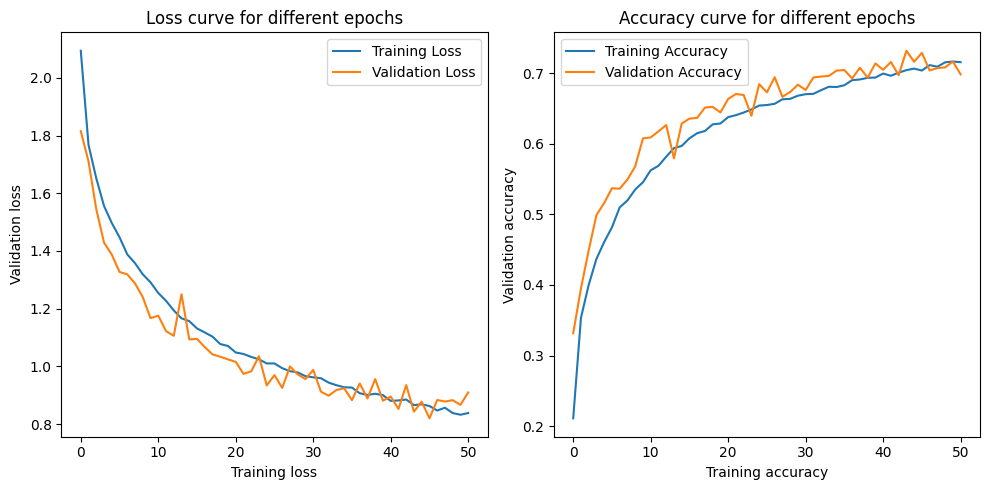

In [15]:
from keras.layers import Conv2D, MaxPooling2D

# Define and train the first CNN model (example)
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(516, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(512, activation='relu'))
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(10, activation='softmax'))
optimizer_val = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

cnn_model2.compile(loss='categorical_crossentropy', optimizer=optimizer_val, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
start_time = time.time()
cnn_history2 = cnn_model2.fit(X_train_data, y_train_data, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
cnn_train_loss_list2 = cnn_history2.history['loss']
cnn_train_accuracy_list2 = cnn_history2.history['accuracy']

cnn_validation_loss_list2 = cnn_history2.history['val_loss']
cnn_validation_accuracy_list2 = cnn_history2.history['val_accuracy']

# Evaluate the first CNN model
cnn_train_loss2, cnn_train_accuracy2 = cnn_model2.evaluate(X_train_data, y_train_data)
cnn_validation_loss2, cnn_validation_accuracy2 = cnn_model2.evaluate(X_val, y_val)
cnn_num_parameters2 = cnn_model2.count_params()
elapsed_time = (end_time - start_time)

elapsed_time = (time.time()-start_time) * 10**3
sec = (elapsed_time/1000)%60
min = (elapsed_time/(1000*60))%60

print("\n==================================================================================")
print(f"Validation Loss: {cnn_validation_loss2:.4f}")
print(f"Validation Accuracy: {cnn_validation_accuracy2*100:.2f}%")
print(f"Training Loss: {cnn_train_loss2:.4f}")
print(f"Training Accuracy: {cnn_train_accuracy2*100:.2f}%")
print(f"Number of Parameters: {cnn_num_parameters2}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")

# Create an array of epoch numbers
epochs = range(1, len(cnn_train_loss_list2) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_train_loss_list2, label='Training Loss')
plt.plot(cnn_validation_loss_list2, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Training loss')
plt.ylabel('Validation loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in cnn_train_accuracy_list2]
plt.subplot(1, 2, 2)
plt.plot(cnn_train_accuracy_list2, label='Training Accuracy')
plt.plot(cnn_validation_accuracy_list2, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Training accuracy')
plt.ylabel('Validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Explanation:** The model above was not good as we could see that overfitting happened at very early stage. After lot of hit and trials, I have created this second model with more convolutional layers along with drop outs to see if overfittinng can be avoided.

Epoch 1/20
1250/1250 [==============================] - 19s 12ms/step - loss: 2.2732 - accuracy: 0.1775 - val_loss: 1.8492 - val_accuracy: 0.3126
Epoch 2/20
1250/1250 [==============================] - 13s 11ms/step - loss: 1.9431 - accuracy: 0.2691 - val_loss: 1.6573 - val_accuracy: 0.4174
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7252 - accuracy: 0.3580 - val_loss: 1.5490 - val_accuracy: 0.4384
Epoch 4/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5239 - accuracy: 0.4391 - val_loss: 1.2911 - val_accuracy: 0.5582
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3227 - accuracy: 0.5261 - val_loss: 1.2004 - val_accuracy: 0.6144
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1251 - accuracy: 0.6065 - val_loss: 1.0911 - val_accuracy: 0.6415
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9563 - accuracy: 0.6729 - val_loss: 0.9031 -

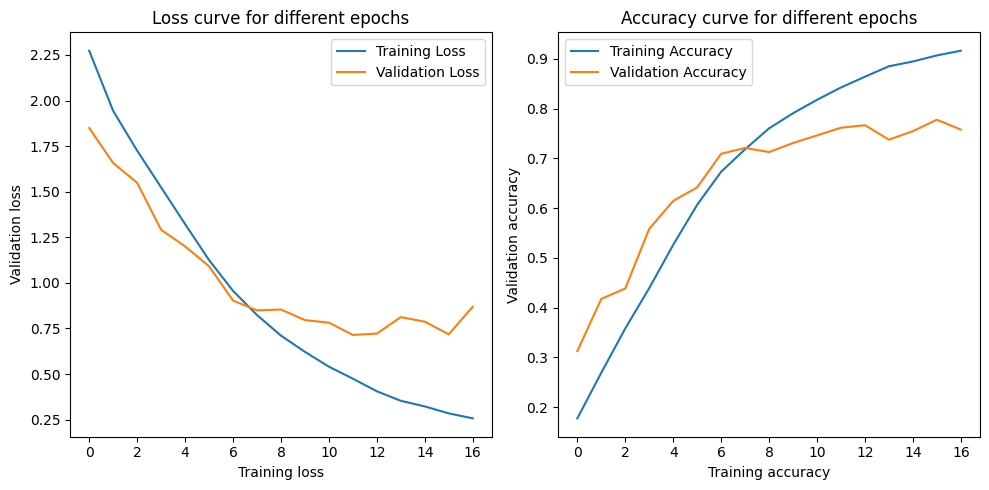

In [17]:
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization

# Define and train the first CNN model (example)
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(32, 32, 1)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
cnn_model3.add(BatchNormalization())
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same'))
cnn_model3.add(BatchNormalization())
cnn_model3.add(MaxPooling2D((2, 2)))
# Add more layers as needed
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu'))
cnn_model3.add(Dropout(0.5))
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(10, activation='softmax'))

cnn_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
start_time = time.time()
cnn_history3 = cnn_model3.fit(X_train_data, y_train_data, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
end_time = time.time()

# Extract loss and accuracy data from history
cnn_train_loss_list3 = cnn_history3.history['loss']
cnn_train_accuracy_list3 = cnn_history3.history['accuracy']

cnn_validation_loss_list3 = cnn_history3.history['val_loss']
cnn_validation_accuracy_list3 = cnn_history3.history['val_accuracy']

# Evaluate the first CNN model
cnn_train_loss3, cnn_train_accuracy3 = cnn_model3.evaluate(X_train_data, y_train_data)
cnn_validation_loss3, cnn_validation_accuracy3 = cnn_model3.evaluate(X_val, y_val)
cnn_num_parameters3 = cnn_model3.count_params()
elapsed_time = (end_time - start_time)

print("\n==================================================================================")
print(f"Validation Loss: {cnn_validation_loss3:.4f}")
print(f"Validation Accuracy: {cnn_validation_accuracy3*100:.2f}%")
print(f"Training Loss: {cnn_train_loss3:.4f}")
print(f"Training Accuracy: {cnn_train_accuracy3*100:.2f}%")
print(f"Number of Parameters: {cnn_num_parameters3}")
print("\n===============Execution time " + "is %d min %d sec" % (min, sec)+"===============")

# Create an array of epoch numbers
epochs = range(1, len(cnn_train_loss_list3) + 1)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_train_loss_list3, label='Training Loss')
plt.plot(cnn_validation_loss_list3, label='Validation Loss')
plt.title('Loss curve for different epochs')
plt.xlabel('Training loss')
plt.ylabel('Validation loss')
plt.legend()

# Plot the accuracy curve
train_accuracy = [acc * 100 for acc in cnn_train_accuracy_list3]
plt.subplot(1, 2, 2)
plt.plot(cnn_train_accuracy_list3, label='Training Accuracy')
plt.plot(cnn_validation_accuracy_list3, label='Validation Accuracy')
plt.title('Accuracy curve for different epochs')
plt.xlabel('Training accuracy')
plt.ylabel('Validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Explanation:** The model 2 was converging very slowly so I have added more drop outs and also changed the batch size. After lot of trials, I got that we can run for just 20 epochs as the model was converging to a good accuracy soon.

313/313 [==============================] - 1s 3ms/step
Test Set Accuracy: 75.68%
Confusion Matrix:
[[717   2  98  36  68   3   3  18  33  22]
 [ 10 829   2  22   3   4  12   9  17  92]
 [ 27   0 695  24 150  57  21  21   5   0]
 [  9   0  88 472 122 213  41  44   6   5]
 [  2   1  32  30 857  30  15  30   3   0]
 [  2   0  59  71  72 747   7  36   3   3]
 [  5   2  69  32 110  32 737   7   3   3]
 [  3   0  31  17  90  41   2 811   1   4]
 [ 49  11  31  10  25   7   9   8 814  36]
 [ 13  28   5  16  14   2   2  25   6 889]]


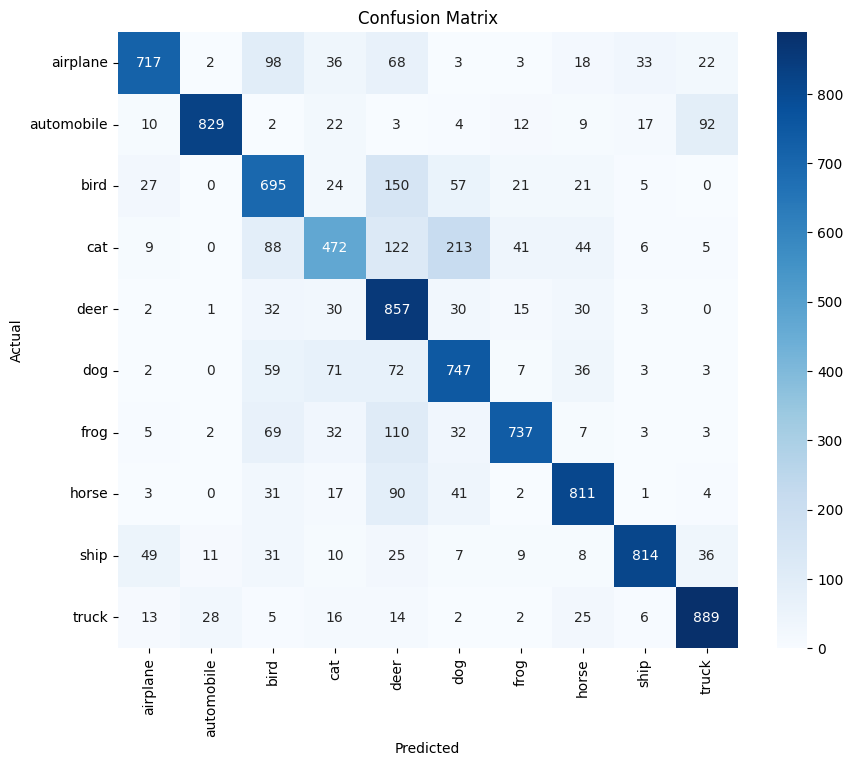

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.72      0.78      1000
  automobile       0.95      0.83      0.89      1000
        bird       0.63      0.69      0.66      1000
         cat       0.65      0.47      0.55      1000
        deer       0.57      0.86      0.68      1000
         dog       0.66      0.75      0.70      1000
        frog       0.87      0.74      0.80      1000
       horse       0.80      0.81      0.81      1000
        ship       0.91      0.81      0.86      1000
       truck       0.84      0.89      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [18]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test_data = X_test_gray.copy()
y_pred = cnn_model3.predict(X_test_data)

# Convert one-hot encoded predictions to class labels
y_pred_labels = tf.argmax(y_pred, axis=1)
y_test1 = tf.argmax(y_test, axis=1)

# Calculate classification accuracy
accuracy_val = accuracy_score(y_test1, y_pred_labels)
print(f"Test Set Accuracy: {accuracy_val*100:.2f}%")

########################################################################################

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate and print the confusion matrix
confusion = confusion_matrix(y_test1, y_pred_labels)
print("Confusion Matrix:")
print(confusion)

# Set the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and print the classification report
report = classification_report(y_test1, y_pred_labels, target_names=class_names)
print("Classification Report:")
print(report)

**Explanation:** The third model has the highest validation accuracy hence choosing the third model as the best model for testing set. Also, plotted the confusion matrix for all the 10 classes and generated a classification report.

**Q1.(e) (Bonus - 5 points) Bayesian optimization for hyper-parameter tuning:** Instead
of performing grid or random search to tune the hyper-parameters of the CNN, we can also try
a model-based method for finding the optimal hyper-parameters through Bayesian optimization. This method performs a more intelligent search on the hyper-parameter space in order
to estimate the best set of hyper-parameters for the data. Use publicly available libraries (e.g.,
hyperopt in Python) to perform a Bayesian optimization on the hyper-parameter space using
the validation set. Report the emotion classification accuracy on the testing set.
Hint: Check this and this source.

In [19]:
pip install hyperopt

In [35]:
import cv2
import numpy as np
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from hyperopt import fmin, tpe, hp
from keras.optimizers import Adam as AdamLegacy

# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# Value normalization
X_train = X_train / 255
X_test = X_test / 255

# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train)
y_test = one_hot_encoder.transform(y_test)

# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [36]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the hyperparameter space
space = {
    'learning_rate': hp.loguniform('learning_rate', -6, -3),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
    'filters': hp.choice('filters', [32, 64, 128]),
    'additional_filters': hp.choice('additional_filters', [64, 128, 256]),  # Hyperparameter for the additional convolutional layer
    'dense_units': hp.choice('dense_units', [128, 256, 512]),
    'batch_size': hp.choice('batch_size', [32, 64, 128])
}

# Define your objective function
def minfunc(params):
    model = Sequential([
        Conv2D(params['filters'], kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(params['additional_filters'], kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(params['dense_units'], activation='relu'),
        Dropout(params['dropout_rate']),
        Dense(256, activation='relu'),
        Dropout(params['dropout_rate']),
        Dense(128, activation='relu'),
        Dropout(params['dropout_rate']),
        Dense(10, activation='softmax')
    ])

    optimizer_val = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_val, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train,epochs=50, batch_size=params['batch_size'],validation_data=(X_val, y_val),verbose=0 )

    # Evaluate on the validation set
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

    return {'loss': -val_acc, 'status': STATUS_OK, 'model': model}

# Initialize the Trials object
trials = Trials()

# Perform Bayesian optimization
best = fmin(fn=minfunc, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Get the best hyperparameters
best_params = space_eval(space, best)

# Build the final model with the best hyperparameters
final_model = Sequential([
    Conv2D(best_params['filters'], kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(best_params['additional_filters'], kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(best_params['dense_units'], activation='relu'),
    Dropout(best_params['dropout_rate']),
    Dense(256, activation='relu'),
    Dropout(best_params['dropout_rate']),
    Dense(128, activation='relu'),
    Dropout(best_params['dropout_rate']),
    Dense(10, activation='softmax')
])



100%|██████████| 10/10 [35:12<00:00, 211.24s/trial, best loss: -0.5896000266075134]


In [38]:
final_optimizer_val = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='categorical_crossentropy', optimizer=final_optimizer_val, metrics=['accuracy'])

# Train the final model on the entire training set
final_model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'], verbose=1)

# Evaluate the final model on the testing set
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)

# Print the testing accuracy
print(f'Testing Accuracy: {test_acc * 100:.2f}%')


Epoch 1/50
625/625 [==============================] - 11s 13ms/step - loss: 1.4989 - accuracy: 0.4658
Epoch 2/50
625/625 [==============================] - 6s 9ms/step - loss: 1.2977 - accuracy: 0.5484
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 1.1762 - accuracy: 0.5921
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 1.0693 - accuracy: 0.6296
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 0.9980 - accuracy: 0.6542
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 0.9264 - accuracy: 0.6790
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 0.8660 - accuracy: 0.7017
Epoch 8/50
625/625 [==============================] - 6s 10ms/step - loss: 0.8187 - accuracy: 0.7147
Epoch 9/50
625/625 [==============================] - 6s 9ms/step - loss: 0.7655 - accuracy: 0.7351
Epoch 10/50
625/625 [==============================] - 6s 9ms/step - loss: 0.7214 - accuracy: 0

**Explanation:** We are performing Bayesian optimization to tune hyperparameters for a Convolutional Neural Network using the Hyperopt library and Keras. The hyperparameter space includes learning rate, dropout rate, number of filters, additional filters for a convolutional layer, dense units, and batch size. The objective function (minfunc) defines a CNN model architecture with specified hyperparameters, compiles it using the Adam optimizer, and trains it on a dataset (X_train, y_train, X_val, y_val) for all epochs. The accuracy on the validation set is used as the metric to be maximized. The script initializes a Trials object and utilizes the Tree-structured Parzen Estimator (TPE) algorithm for Bayesian optimization, aiming to find the set of hyperparameters that maximizes the validation accuracy. The optimization is performed for a maximum of 10 evaluations. The best hyperparameters obtained from the optimization are then used to construct the final CNN model (final_model). This model is expected to have improved performance compared to manually selected hyperparameters, as it is optimized based on the specified search space. The script provides a systematic approach for hyperparameter tuning, enhancing the efficiency of neural network model development.

**Q1(f) (Bonus - 5 points) Fine-tuning:** Use a pre-trained CNN (e.g., the pre-trained example of the MNIST dataset that we saw in class, or any other available pre-trained CNN) and finetune it on the CIFAR-10 data. Please experiment with different fine-tuning hyper-parameters (e.g., #layers to fine-tune, regularization during fine-tuning) on the validation set. Report the classification accuracy for all hyper-parameter combinations on the validation set. Also report the classification accuracy with the best hyper-parameter combination on the testing set.

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess your data (e.g., normalization)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters to experiment with
hyperparams = [
    {
        'num_fine_tune_layers': 256,  # the number of fine-tuned layers
        'dropout_rate': 0.4
    }
]
results = []

# using ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False)

for i in hyperparams:
    # Add custom layers on top of the pre-trained ResNet50 model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    for l in base_model.layers[:i['num_fine_tune_layers']]:
        l.trainable = True  # Fine-tune more layers

    x = Dense(512, activation='tanh')(x)
    x = Dropout(i['dropout_rate'])(x)
    x = Dense(256, activation='tanh')(x)
    x = Dropout(i['dropout_rate'])(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(i['dropout_rate'])(x)

    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = Adam(learning_rate=0.0001)  # Use 'learning_rate' parameter
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Data augmentation
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train)

    # Train the model for more epochs
    history = model.fit(datagen.flow(X_train, tf.keras.utils.to_categorical(y_train, 10), batch_size=128),
                        steps_per_epoch=len(X_train) // 128,
                        epochs=50,  #  the number of epochs
                        validation_data=(X_val, tf.keras.utils.to_categorical(y_val, 10)))

    val_accuracy = history.history['val_accuracy'][-1]
    results.append({
        'hyperparameters': i,
        'validation_accuracy': val_accuracy,
        'model': model
    })

# Find the best model based on validation accuracy
best_model = max(results, key=lambda x: x['validation_accuracy'])['model']

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, 10))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy (Fine-Tuning): {test_accuracy * 100:.2f}%")


Epoch 1/50
312/312 [==============================] - 72s 137ms/step - loss: 2.1496 - accuracy: 0.2515 - val_loss: 2.3801 - val_accuracy: 0.0924
Epoch 2/50
312/312 [==============================] - 41s 130ms/step - loss: 1.5382 - accuracy: 0.4685 - val_loss: 2.8196 - val_accuracy: 0.1034
Epoch 3/50
312/312 [==============================] - 42s 135ms/step - loss: 1.2935 - accuracy: 0.5629 - val_loss: 1.4878 - val_accuracy: 0.4902
Epoch 4/50
312/312 [==============================] - 39s 126ms/step - loss: 1.1592 - accuracy: 0.6146 - val_loss: 0.9015 - val_accuracy: 0.6946
Epoch 5/50
312/312 [==============================] - 38s 123ms/step - loss: 1.0725 - accuracy: 0.6449 - val_loss: 0.8467 - val_accuracy: 0.7110
Epoch 6/50
312/312 [==============================] - 41s 131ms/step - loss: 1.0058 - accuracy: 0.6684 - val_loss: 0.8085 - val_accuracy: 0.7250
Epoch 7/50
312/312 [==============================] - 42s 134ms/step - loss: 0.9580 - accuracy: 0.6862 - val_loss: 0.8417 - val_ac

**Explanation:** This script fine-tunes a pre-trained ResNet50 model on the CIFAR-10 dataset. It loads the dataset, normalizes the data, and splits it into training, validation, and test sets. Hyperparameters, such as the number of fine-tuned layers and dropout rates, are experimented with. The script iterates over these hyperparameters, adds custom layers to the ResNet50 model, and compiles it with an Adam optimizer. Data augmentation is applied using image transformations, and the model is trained for additional epochs. The best model, determined by the highest validation accuracy, is then evaluated on the test set. The script provides a systematic approach to fine-tuning a deep learning model for image classification, enhancing performance through experimentation with hyperparameters and data augmentation techniques.

**Test set accuracy = 82.40%**

**Q2: SVM**
In this problem, we will use university application data for the purpose of admission classification. The data can be found in the following link: https://github.com/selva86/datasets/blob/master/Admission.csv

In [28]:
import pandas as pd
url = "https://github.com/selva86/datasets/raw/master/Admission.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Explanation:** Loaded the given dataset

**Q2.(a) (4 points) Data Preprocessing:** Create a binary label based on the column ”Chance of
Admit ”. Convert any values bigger than the mean to 1 and 0 otherwise.

In [29]:
# Calculate the mean of the "Chance of Admit" column
mean_chance_of_admit = df["Chance of Admit "].mean()
print('mean:', mean_chance_of_admit)
# Create a new binary label column based on the condition
df["Admission_Label"] = (df["Chance of Admit "] > mean_chance_of_admit).astype(int)

# Display the updated DataFrame with the new label
print(df.head())

mean: 0.72435
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   Admission_Label  
0         1              0.92                1  
1         1              0.76                1  
2         1              0.72                0  
3         1              0.80                1  
4         0              0.65                0  


**Explanation:** Preprocessed the data. Create a new binary label.

**Q2.(b) (4 points) Model Initialization:** Initilize 4 different SVM models with the following
kernels:
1. SVC with linear kernel
2. LinearSVC (linear kernel)
3. SVC with RBF kernel
4. SVC with polynomial (degree 3) kernel

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC

# Split the data into features (X) and target variable (y)
X = df.drop('Admission_Label', axis=1)
y = df['Admission_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear')
linear_svc = LinearSVC(dual=False)  # LinearSVC uses one-vs-the-rest multiclass reduction by default
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

# Train the models
svm_linear.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)


SVC(kernel='poly')

**Explanation:** Splitted data into training and testing dataset.Standardized the features to ensure that the features have zero mean and unit variance. Initialised four SVM models with different kernels as asked. The fit method is used to train each SVM model on the training data.

**Q2.(c) (10 points) Feature Selection and Model Training:** Train each SVM Model with the
following feature combinations to predict admission.
1. CGPA and SOP
2. CGPA and GRE Score
3. SOP with LOR
4. LOR with GRE Score

In [31]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Define feature combinations
feature_combinations = [
    ['CGPA', 'SOP'],
    ['CGPA', 'GRE Score'],
    ['SOP', 'LOR '],
    ['LOR ', 'GRE Score']
]

# Initialize models with different kernels
svm_linear = SVC(kernel='linear')
linear_svc = LinearSVC(dual=False)
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

# Iterate over feature combinations and train models
for features in feature_combinations:
    # Extract column indices for selected features
    feature_indices = [X.columns.get_loc(feature) for feature in features]

    # Extract selected features
    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]

    # Train models
    svm_linear.fit(X_train_subset, y_train)
    linear_svc.fit(X_train_subset, y_train)
    svm_rbf.fit(X_train_subset, y_train)
    svm_poly.fit(X_train_subset, y_train)

    # Make predictions
    y_pred_linear = svm_linear.predict(X_test_subset)
    y_pred_linear_svc = linear_svc.predict(X_test_subset)
    y_pred_rbf = svm_rbf.predict(X_test_subset)
    y_pred_poly = svm_poly.predict(X_test_subset)

    # Evaluate and print accuracy for each model
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)

    print(f"\nFeatures: {features}")
    print(f"Linear SVM Accuracy: {accuracy_linear * 100:.2f}%")
    print(f"LinearSVC Accuracy: {accuracy_linear_svc * 100:.2f}%")
    print(f"RBF SVM Accuracy: {accuracy_rbf * 100:.2f}%")
    print(f"Polynomial SVM Accuracy: {accuracy_poly * 100:.2f}%")



Features: ['CGPA', 'SOP']
Linear SVM Accuracy: 86.25%
LinearSVC Accuracy: 87.50%
RBF SVM Accuracy: 85.00%
Polynomial SVM Accuracy: 85.00%

Features: ['CGPA', 'GRE Score']
Linear SVM Accuracy: 91.25%
LinearSVC Accuracy: 91.25%
RBF SVM Accuracy: 91.25%
Polynomial SVM Accuracy: 82.50%

Features: ['SOP', 'LOR ']
Linear SVM Accuracy: 85.00%
LinearSVC Accuracy: 83.75%
RBF SVM Accuracy: 81.25%
Polynomial SVM Accuracy: 75.00%

Features: ['LOR ', 'GRE Score']
Linear SVM Accuracy: 92.50%
LinearSVC Accuracy: 91.25%
RBF SVM Accuracy: 92.50%
Polynomial SVM Accuracy: 86.25%


**Explanation:** Defined a list of feature combinations ->feature_combinations, where each combination is a list of feature names to be used in training the models. The features considered in each combination are 'CGPA', 'SOP', 'GRE Score', and 'LOR '. Initialized four SVM models with different kernels. The code then iterates over each feature combination, trains the four SVM models on the training subset corresponding to the selected features, makes predictions on the test subset, and evaluates the accuracy of each model. The accuracy is calculated using the accuracy_score function from scikit-learn. For each feature combination, the code prints the selected features and the accuracy of each SVM model. This allows you to compare the performance of different SVM models with different kernels on various feature subsets.The goal is to analyze how well the SVM models perform on different combinations of features-kernels. This process helps in understanding which features or combinations of features contribute more effectively to the models' predictive accuracy.

**Q2.(d) (10 points) Result Visualization:** Visualize the decision boundary for each model and for each input combination.

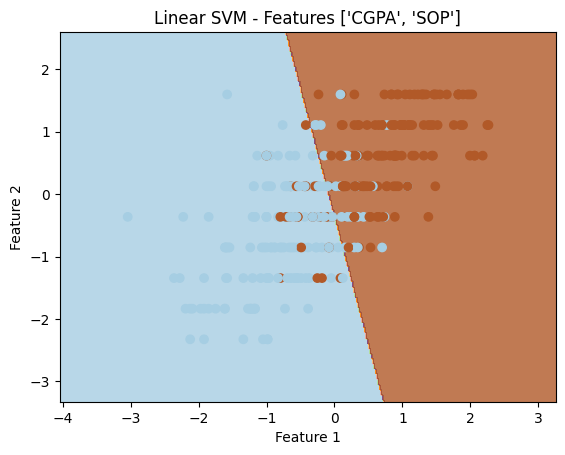

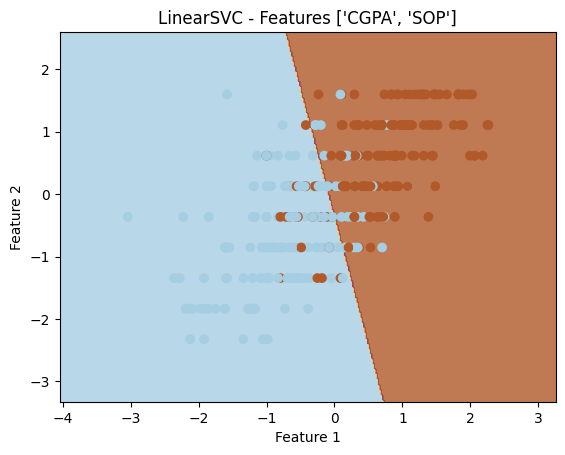

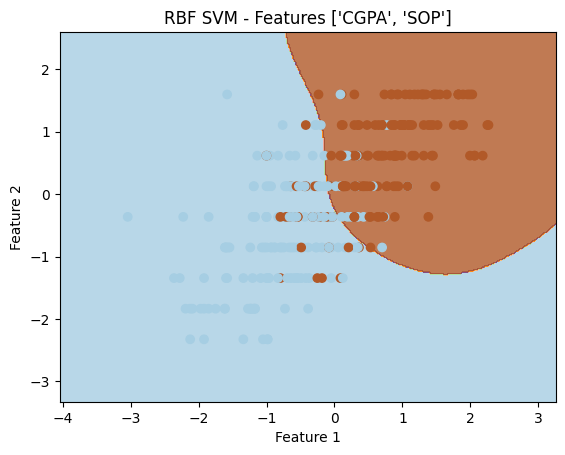

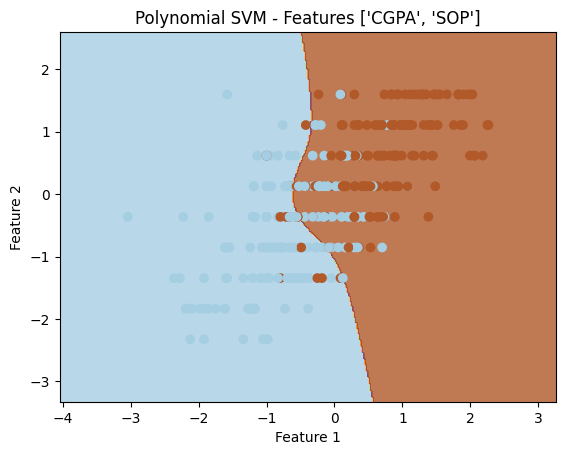

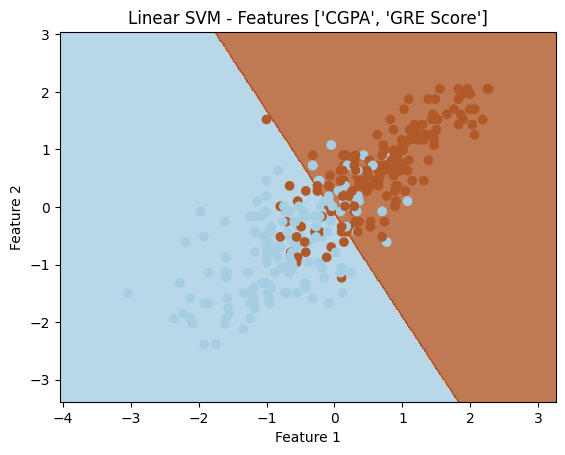

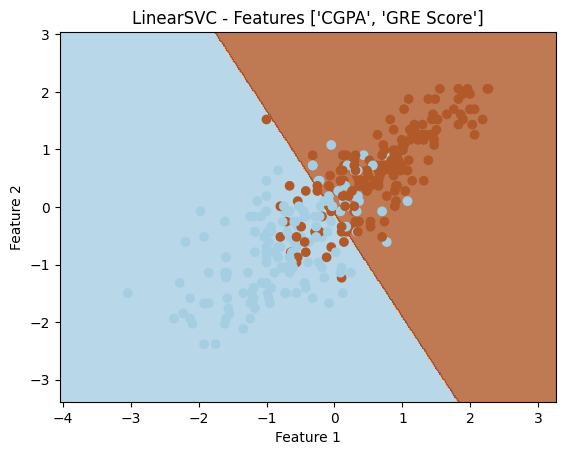

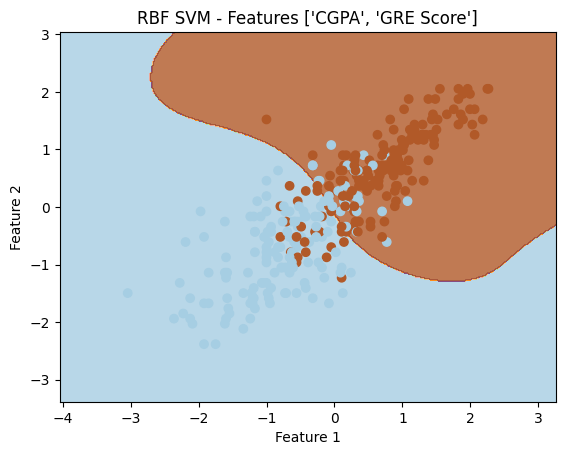

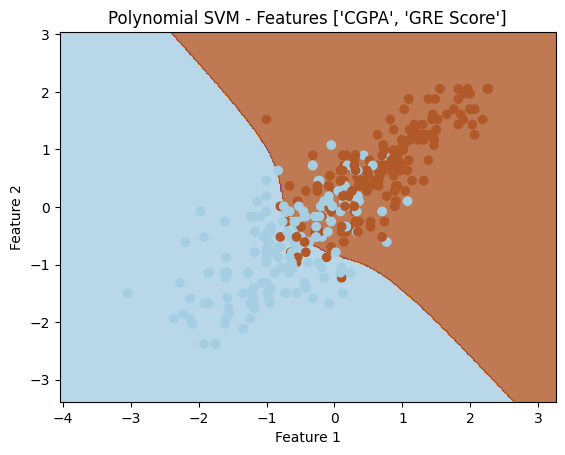

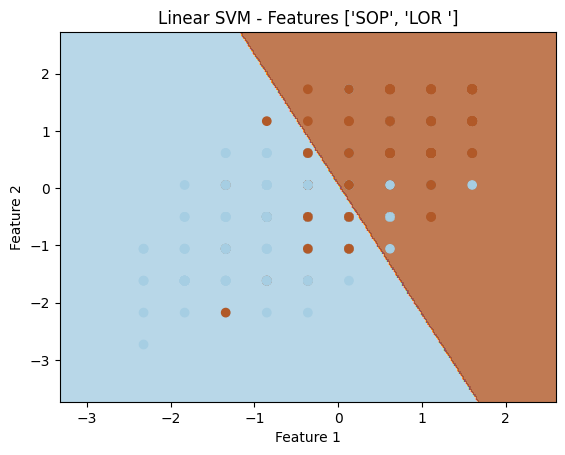

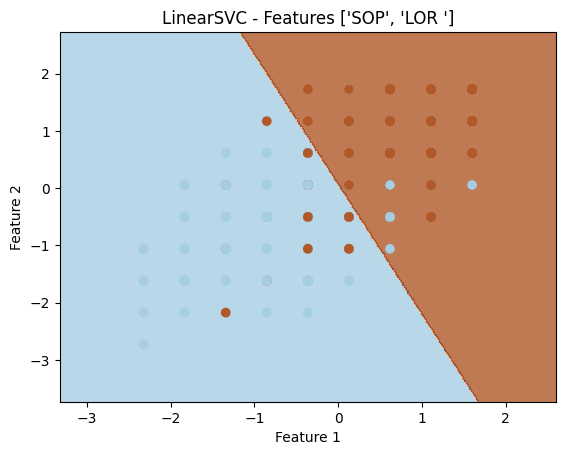

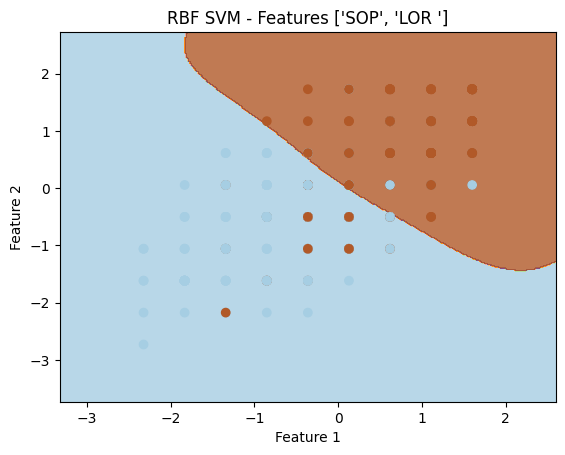

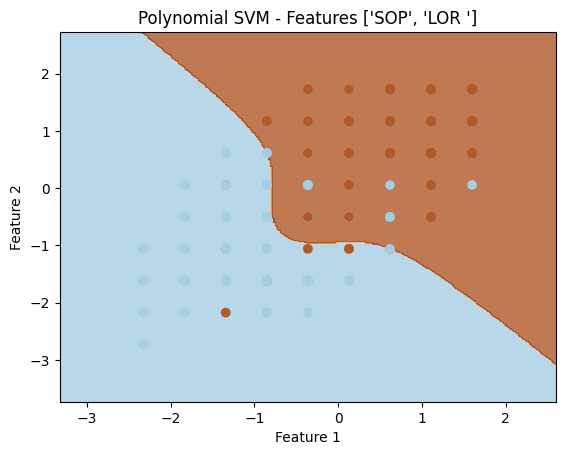

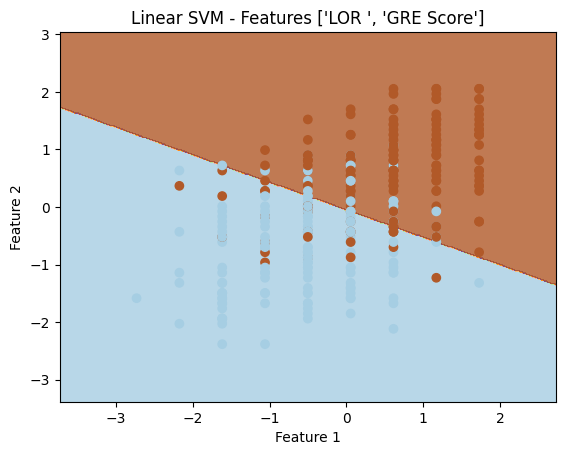

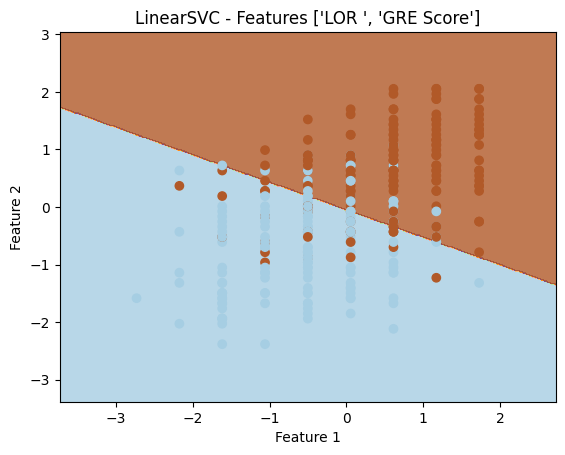

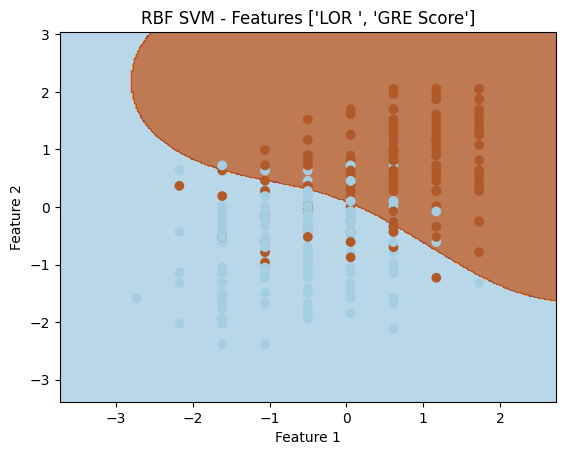

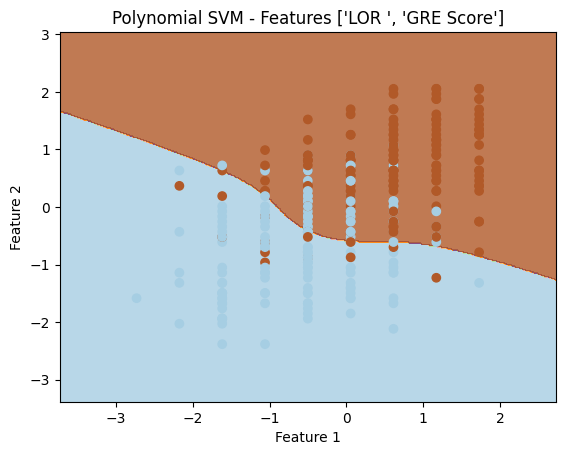

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Function to visualize decision boundaries
def visualize_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh

    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Iterate over feature combinations and visualize decision boundaries
for idx, features in enumerate(feature_combinations):
    # Extract column indices for selected features
    feature_indices = [X.columns.get_loc(feature) for feature in features]

    # Extract selected features
    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]

    # Standardize the features for better visualization
    scaler = StandardScaler()
    X_train_subset = scaler.fit_transform(X_train_subset)
    X_test_subset = scaler.transform(X_test_subset)

    # Initialize models
    svm_linear = SVC(kernel='linear')
    linear_svc = SVC(kernel='linear')
    svm_rbf = SVC(kernel='rbf')
    svm_poly = SVC(kernel='poly', degree=3)

    # Train models
    svm_linear.fit(X_train_subset, y_train)
    linear_svc.fit(X_train_subset, y_train)
    svm_rbf.fit(X_train_subset, y_train)
    svm_poly.fit(X_train_subset, y_train)

    # Visualize decision boundaries for each model
    visualize_decision_boundary(svm_linear, X_train_subset, y_train, f"Linear SVM - Features {features}")
    visualize_decision_boundary(linear_svc, X_train_subset, y_train, f"LinearSVC - Features {features}")
    visualize_decision_boundary(svm_rbf, X_train_subset, y_train, f"RBF SVM - Features {features}")
    visualize_decision_boundary(svm_poly, X_train_subset, y_train, f"Polynomial SVM - Features {features}")


**Explanation:** We visualize decision boundaries for different SVM models with various kernels using different feature combinations. Visualization function takes an SVM model (model), feature data (X), target labels (y), and a title for the plot. It generates a mesh grid of points, predicts the class labels for each point using the SVM model, and then visualizes the decision boundaries along with the data points. Feature Combination Iteration iterates over each feature combination, extracting the column indices for the selected features and creating subsets of the training and testing data based on these features. SVM models are initialized with different kernels, and each model is trained on the subset of the training data. The decision boundaries and data points are visualized for each SVM model with the corresponding feature combination. The title of each plot includes the type of SVM model and the features used. This is useful for visually inspecting how different SVM models with various kernels perform on different feature combinations. It helps to understand how the models separate the classes in the feature space and how sensitive they are to different feature subsets.

**Q2.(e) (4 points) Result Analysis:** Just by looking at the figures you generated before, answer the following question. Which of the feature + kernel combinations did give you the best result?

**Explanation:** From the above the figure we can see that Linear SVM and RBF SVM models separate the classes in the feature space with clear decion boundaries for the LOR vs GRE Score features. The decision boundary is good for them and hence it will lead to less misclassification. Hence, these two are the best feature + kernel combinations. If we go back and compare the accuracy we can validate it again as we see accuracy is maximum for these two.

**Q2.(f) (4 points) Result Postprocessing:** Were there any outliers in the data? If yes, please explain how we can use a one-class SVM to detect them. (No need to implement/code)

**Explanation:** Yes, from the plots we have above we can clearly say that the dataset has outliers. We can use One-class Support Vector Machines for outlier detection. It is particularly useful when you have a dataset with a majority of inliers and a small number of outliers. It builds a model based on the inliers and identifies instances that deviate significantly from the learned pattern.
While training, these models are trained on the majority of the data, assuming it represents the normal behavior of the system such that it captures the traits of normal data, and then form a decision boundary around it. While testing, a hyperplane that separates the normal data from the origin is created by the model. Points situated on the opposite side of this hyperplane are considered outliers.The model assigns scores to data points based on their proximity to the decision boundary, with higher scores indicating a greater likelihood of being outliers. A threshold is then applied to these scores to flag data points that exceed the threshold as outliers. This way, One-class Support Vector Machines can be employed for outlier detection. This model proves effective for datasets where the majority of instances represent the normal state, and its purpose is to identify rare occurrences or outliers.

<ipython-input-33-7865e5dc347e>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(outliers_train == -1, 'red', 'blue'), cmap=plt.cm.Paired)


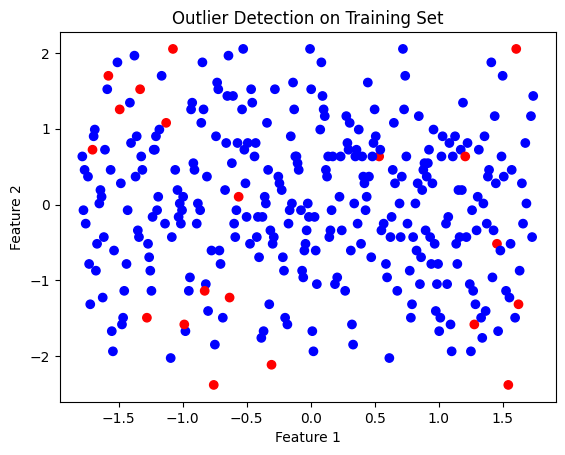

<ipython-input-33-7865e5dc347e>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(outliers_test == -1, 'red', 'blue'), cmap=plt.cm.Paired)


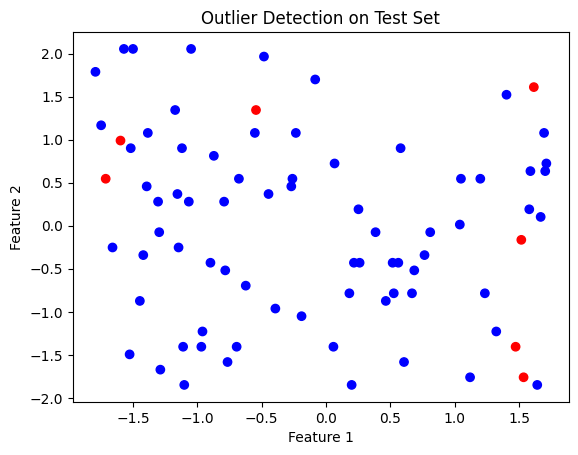

In [33]:
from sklearn.svm import OneClassSVM
import numpy as np

# Assuming X_train and X_test are standardized features
# Train a one-class SVM model
one_class_svm = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
one_class_svm.fit(X_train)

# Predict outliers on the training and test sets
outliers_train = one_class_svm.predict(X_train)
outliers_test = one_class_svm.predict(X_test)

# Visualize outliers on the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(outliers_train == -1, 'red', 'blue'), cmap=plt.cm.Paired)
plt.title('Outlier Detection on Training Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize outliers on the test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(outliers_test == -1, 'red', 'blue'), cmap=plt.cm.Paired)
plt.title('Outlier Detection on Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Explanation:** OneClassSVM is used for outlier detection. Outliers are visualized using scatter plots, where outliers are marked in red.